In [133]:
# !pip install minisom
# !pip install sklearn
# !pip install sklearn-som
# !pip install yellowbrick
# !pip install plotly.express
import warnings
warnings.filterwarnings('ignore')

In [1]:
from collections import defaultdict
import numpy as np
from matplotlib import pyplot as plt
# from minisom import MiniSom
from sklearn.cluster import KMeans, DBSCAN
from sklearn.datasets import load_digits
from sklearn.metrics import silhouette_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.utils.multiclass import unique_labels
from sklearn.manifold import TSNE
from tqdm import tqdm
from sklearn_som.som import SOM
import seaborn as sns
import pandas as pd
from yellowbrick.cluster import KElbowVisualizer
import plotly.express as px
import seaborn as sns
from sklearn.datasets import make_blobs
from yellowbrick.cluster import InterclusterDistance
from sklearn.datasets import make_blobs, make_circles, make_s_curve

In [2]:
import numpy as np
import pandas as pd
import re

#============= Read CSV and apply data preperation =============#
df = pd.read_csv("Assignment3_dataset.csv")

In [3]:
    
df['Insulin'] = df['Insulin'].replace(0, df['Insulin'].mean())
df['Age'] = df['Age'].replace(0, df['Age'].mean())
df['SkinThickness'] = df['SkinThickness'].replace(0, df['SkinThickness'].mean())
df['BloodPressure'] = df['BloodPressure'].replace(0, df['BloodPressure'].mean())
df['Pregnancies'] = df['Pregnancies'].replace(0, df['Pregnancies'].mean())



In [4]:
d=df.to_numpy()
data=df.iloc[:,:-1]
target=df['Outcome']
X = np.array(data)
Y= np.array(target)

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score, confusion_matrix
# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)
predictions = logisticRegr.predict(x_test)
evaluation_LR = accuracy_score(y_test, predictions)

In [7]:
print(evaluation_LR)
print(len(predictions))
print(len(y_test))

0.7604166666666666
192
192


In [8]:
# Use score method to get accuracy of model
score = logisticRegr.score(x_test, y_test)
print(score)

0.7604166666666666


In [9]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=6)
 
knn.fit(x_train, y_train)
 
# Predict on dataset which model has not seen before

KNN_pred=knn.predict(x_test)
evaluation_KNN = accuracy_score(y_test, KNN_pred)
evaluation_KNN

0.75

TNSE for Trainig 

In [10]:
def draw_Tsne(x,y):
  
  data=x                               
  data_labels=y                        
  tsne = TSNE(n_components=2, random_state=0)
  X_2d = tsne.fit_transform(data)  

  #plot tsne for x_test and x_train
  classes=unique_labels(data_labels)         
  target_ids = range(len(classes))
  plt.figure(figsize=(6, 5))
  colors = 'r', 'g'
  for i, c, label in zip(target_ids, colors, classes):
    plt.scatter(X_2d[data_labels == i,1], X_2d[data_labels == i, 0], c=c, label=label)
    
  plt.legend()
  plt.show()

c:\Users\debi\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\debi\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


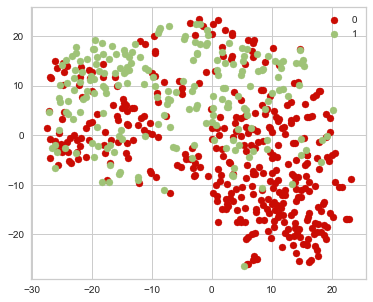

In [11]:
draw_Tsne(x_train,y_train)

TNSE for Testing

c:\Users\debi\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\debi\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


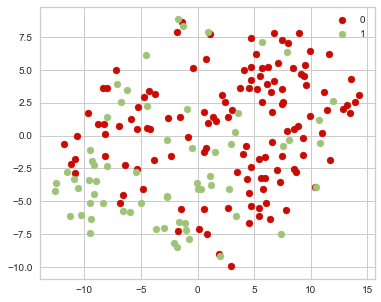

In [13]:
draw_Tsne(x_test,y_test)

c:\Users\debi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


For n_clusters = 2 The average silhouette_score is : 0.28130595959807375


c:\Users\debi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


For n_clusters = 3 The average silhouette_score is : 0.24069301404843038


c:\Users\debi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


For n_clusters = 4 The average silhouette_score is : 0.20472777635644954


c:\Users\debi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


For n_clusters = 5 The average silhouette_score is : 0.19312329300323347


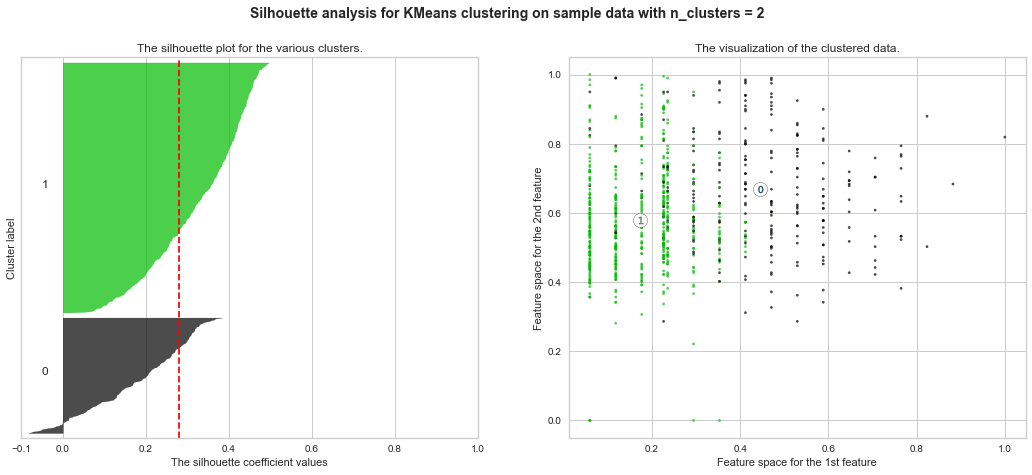

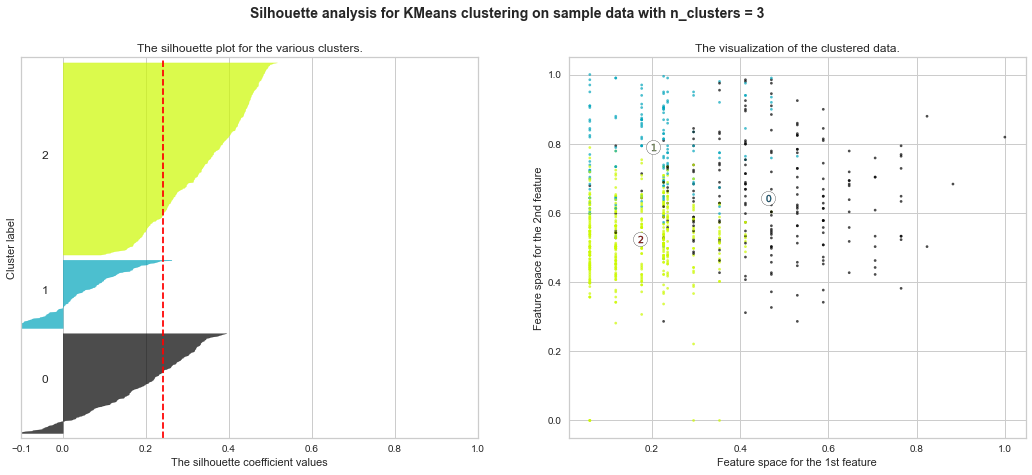

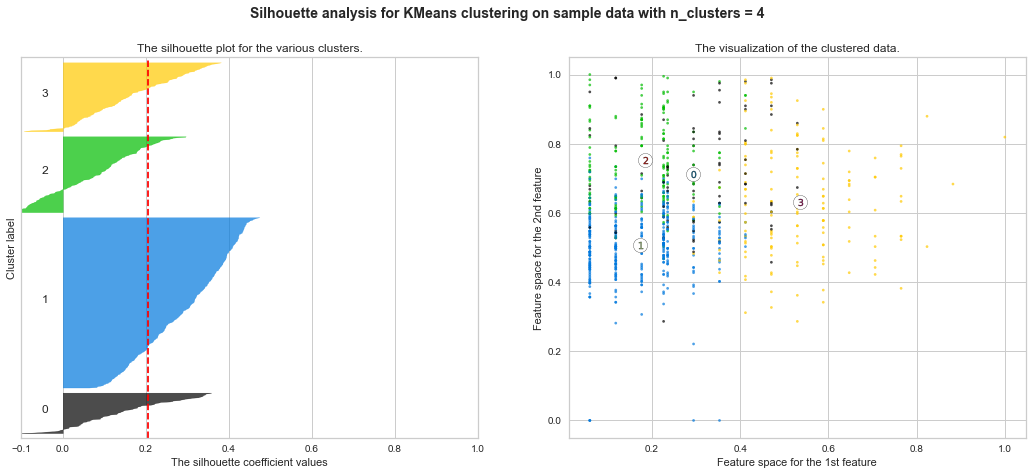

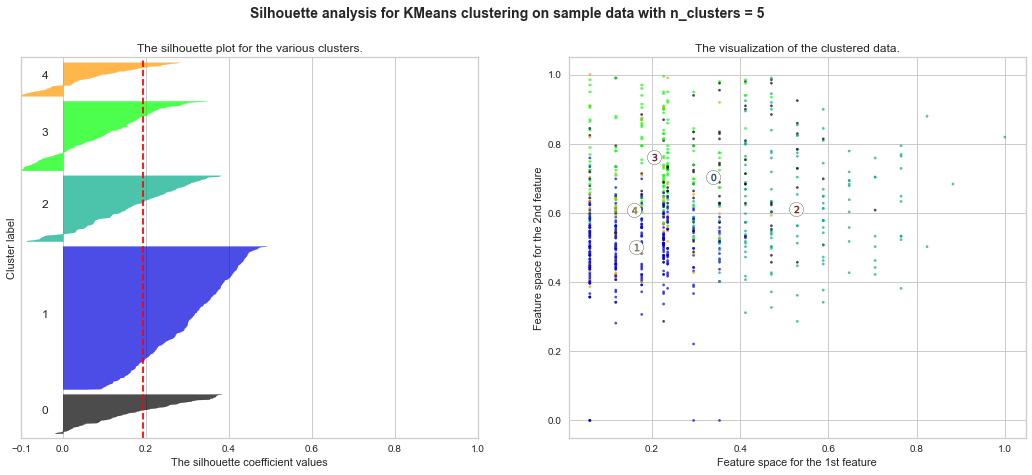

In [14]:


from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np



range_n_clusters = [2, 3, 4, 5]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

c:\Users\debi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


<AxesSubplot:>

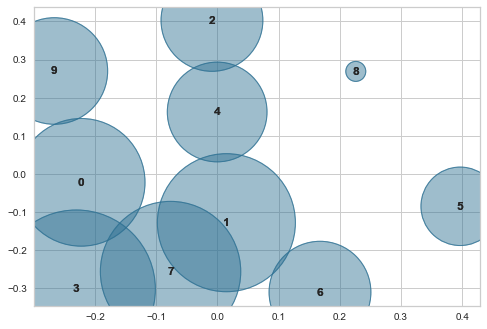

In [15]:
model = KMeans(10,random_state=0)
visualizer = InterclusterDistance(model,random_state=0)

visualizer.fit(X)        
visualizer.draw()

c:\Users\debi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\debi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\debi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\debi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows wi

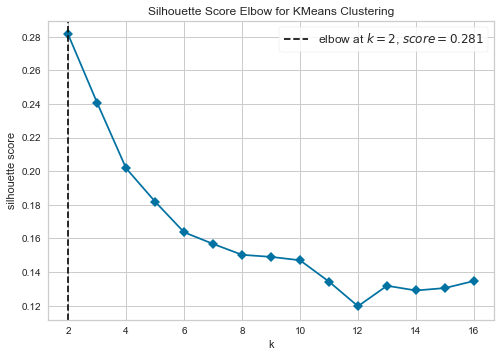

In [16]:
from yellowbrick.cluster.elbow import kelbow_visualizer
model = kelbow_visualizer(KMeans(random_state=0), X, k=(2,17),metric='silhouette',timings=False)  

pass

In [17]:
#after supervising
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ("kmeans", KMeans(n_clusters=8)),  #trying changing this to 50 or 90 and observe the difference in accuracy
    ("log_reg", LogisticRegression(solver='lbfgs', max_iter=10000))
])
pipeline.fit(x_train, y_train)
print(pipeline.score(x_test, y_test))

c:\Users\debi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


0.7552083333333334


In [18]:

# from sklearn.decomposition import PCA
# acc_dict = {}
# for n_comp in range(, 8):
#   LR = LogisticRegression()
#   pca = PCA(n_components=n_comp)
#   X_pca = pca.fit_transform(X)
#   X_train_pca, X_test_pca, y_train_pca, y_test_pca =train_test_split(X_pca, Y, test_size=0.25, random_state=0)
#   LR.fit(X_train_pca, y_train)
#   y_predict_pca = LR.predict(X_test_pca)
#   acc_pca = accuracy_score(y_test, y_predict_pca)
#   acc_dict[n_comp] = acc_pca

# plt.plot(*zip(*sorted(acc_dict.items())))
# Title = "PCA Method to reduce feature dimension"
# plt.title(Title, fontsize=16)
# plt.xlabel("Number of Components", fontsize=16)
# plt.ylabel("Accuracy (%)", fontsize=16)

# print("Maximum accuracy:", max(acc_dict.values()))
# print("Best number of n_components:", max(acc_dict, key=acc_dict.get))

In [18]:
def fun(model):

  from sklearn.decomposition import PCA
  acc_dict = {}
  for n_comp in range(1, 8):

    
    pca = PCA(n_components=n_comp)
    X_pca = pca.fit_transform(X)
    X_train_pca, X_test_pca, y_train_pca, y_test_pca =train_test_split(X_pca, Y, test_size=0.25, random_state=0)
    model.fit(X_train_pca, y_train)
    y_predict_pca = model.predict(X_test_pca)
    acc_pca = accuracy_score(y_test, y_predict_pca)
    acc_dict[n_comp] = acc_pca

  plt.plot(*zip(*sorted(acc_dict.items())))
  Title = "PCA Method to reduce feature dimension"
  plt.title(Title, fontsize=16)
  plt.xlabel("Number of Components", fontsize=16)
  plt.ylabel("Accuracy (%)", fontsize=16)

  print("Maximum accuracy:", max(acc_dict.values()))
  print("Best number of n_components:", max(acc_dict, key=acc_dict.get))
  return X_train_pca, X_test_pca, y_train_pca, y_test_pca


Maximum accuracy: 0.765625
Best number of n_components: 6


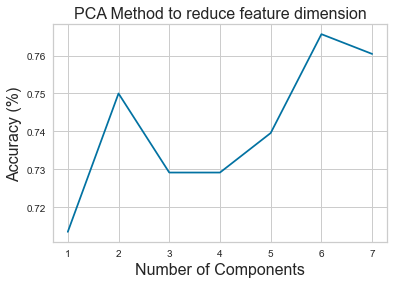

In [36]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca=fun(LogisticRegression())

Maximum accuracy: 0.7239583333333334
Best number of n_components: 5


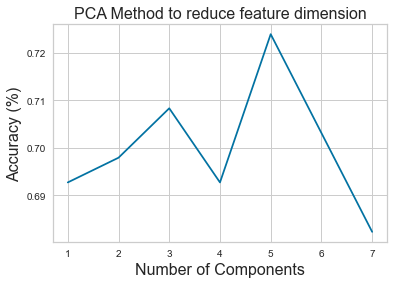

In [37]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca=fun( KNeighborsClassifier())

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


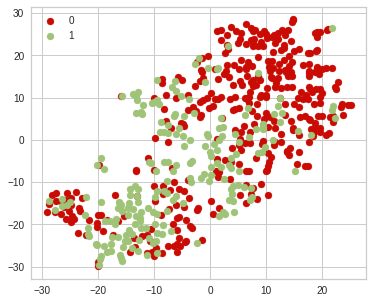

In [22]:
draw_Tsne(X_train_pca,y_train_pca)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


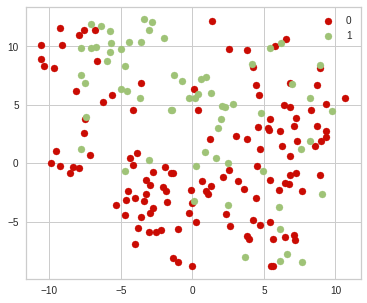

In [23]:
draw_Tsne(X_test_pca,y_test_pca)

In [19]:
from sklearn.decomposition import PCA
def pca(n):

  pca = PCA(n_components=n)
  X_pca = pca.fit_transform(X)
  X_train_pca, X_test_pca, y_train_pca, y_test_pca =train_test_split(X_pca, Y, test_size=0.25, random_state=0)
  model.fit(X_train_pca, y_train)
  y_predict_pca = model.predict(X_test_pca)
  acc_pca = accuracy_score(y_test, y_predict_pca)
  return X_train_pca, X_test_pca, y_train_pca, y_test_pca

In [20]:
def LogReg(x_train_new, x_test_new, y_train_new, y_test_new ):
  
  LR=LogisticRegression()
  
  LR.fit(x_train_new, y_train_new)
  
  predictions = LR.predict(x_test_new)
  # print(len(predictions))
  # print(len(y_test_new))
  acc_LR = accuracy_score(y_test_new, predictions)
  return acc_LR




In [21]:
def LR_with_pca(X_train_pca, X_test_pca, y_train_pca, y_test_pca):
  
  LR=LogisticRegression()
  LR.fit(X_train_pca, y_train_pca)
  predictions = LR.predict(X_test_pca)
  acc_LR_pca = accuracy_score(y_test_pca, predictions)
  return acc_LR_pca

In [22]:
from sklearn.neighbors import KNeighborsClassifier
def KNN(x_train_new, x_test_new, y_train_new, y_test_new):
  
  kNN = KNeighborsClassifier(n_neighbors=2)
 
  kNN.fit(x_train_new, y_train_new)
 
  # Predict on dataset which model has not seen before

  KNN_pred=kNN.predict(x_test_new)
  acc_knn= accuracy_score(y_test_new, KNN_pred)



  
  
  return acc_knn


In [23]:
def KNN_with_pca(X_train_pca, X_test_pca, y_train_pca, y_test_pca):
  
  knn = KNeighborsClassifier()
 
  knn.fit(X_train_pca, y_train_pca)
 
  # Predict on dataset which model has not seen before

  KNN_pred=knn.predict(X_test_pca)
  acc_knn_pca= accuracy_score(y_test_pca, KNN_pred)
  return acc_knn_pca

In [24]:
new_X=X[:,0:2]
new_X
x_train_new, x_test_new, y_train_new, y_test_new = train_test_split(new_X, Y, test_size=0.25, random_state=0)
print(len(x_train_new),len( x_test_new),len( y_train_new),len( y_test_new ))

576 192 576 192


In [ ]:
accList=[]
for n in range(2,8):
  new_X=X[:,0:n]
  x_train_new, x_test_new, y_train_new, y_test_new = train_test_split(new_X, Y, test_size=0.25, random_state=0)
  acc_LR=LogReg(x_train_new, x_test_new, y_train_new, y_test_new )
  X_train_pca, X_test_pca, y_train_pca, y_test_pca=pca(n)
  acc_LR_pca=LR_with_pca(X_train_pca, X_test_pca, y_train_pca, y_test_pca)
  acc_knn=KNN(x_train_new, x_test_new, y_train_new, y_test_new)
  acc_KNN_pca=KNN_with_pca(X_train_pca, X_test_pca, y_train_pca, y_test_pca)
  accList.append(acc_LR)
  accList.append(acc_LR_pca)
  accList.append(acc_knn)
  accList.append(acc_KNN_pca)

In [ ]:
accList
nList=[2,3,4,5,6,7,8]

<function matplotlib.pyplot.show(close=None, block=None)>

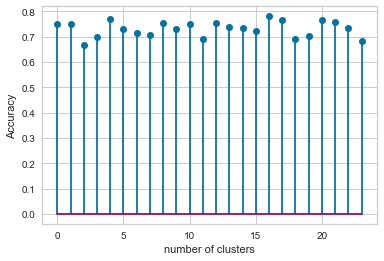

In [ ]:
#plot number of neurons/number of clusters vs accuracy score
#plt.bar(accList, nList, color ='maroon')
plt.stem(accList)
plt.xlabel("number of clusters")
plt.ylabel("Accuracy")
plt.show

# 4. Use the following Feature Selection methods (one for each method). Find the best
number of features based on both, the LR and K-NN classifiers’ test accuracies.

In [27]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.411765,0.623116,0.573770,0.333333,0.254137,0.380030,0.035440,0.266667,0
1,0.294118,0.542714,0.590164,0.434343,0.088652,0.538003,0.078992,0.200000,0
2,0.058824,0.437186,0.491803,0.373737,0.088652,0.554396,0.184031,0.016667,0
3,0.058824,0.723618,0.672131,0.464646,0.212766,0.687034,0.109735,0.416667,1
4,0.058824,0.557789,0.508197,0.131313,0.215130,0.357675,0.025619,0.033333,0
...,...,...,...,...,...,...,...,...,...
763,0.226180,0.587940,0.655738,0.313131,0.062648,0.673621,0.004697,0.050000,0
764,0.705882,0.422111,0.590164,0.313131,0.094326,0.442623,0.093510,0.416667,1
765,0.352941,0.618090,0.590164,0.454545,0.271868,0.500745,0.279675,0.216667,0
766,0.058824,0.984925,0.622951,0.363636,0.294326,0.543964,0.340307,0.133333,1


In [28]:
df.var()

Pregnancies                 0.030814
Glucose                     0.025814
BloodPressure               0.009863
SkinThickness               0.009464
Insulin                     0.012105
BMI                         0.013806
DiabetesPedigreeFunction    0.020014
Age                         0.034718
Outcome                     0.227483
dtype: float64

## (a) Filter Methods with Information gain and ANOVA

In [75]:
def KNN_model(x_train_new, x_test_new, y_train_new, y_test_new):
  kNN = KNeighborsClassifier()
  kNN.fit(x_train_new, y_train_new)
  # Predict on dataset which model has not seen before
  KNN_pred=kNN.predict(x_test_new)
  acc_knn= accuracy_score(y_test_new, KNN_pred)

  return acc_knn


In [119]:
from sklearn.feature_selection import SelectKBest, f_classif,mutual_info_classif
def feature_selection(model,X_teain,y_train, feature_selection_method = f_classif, range = range(1,len(df.columns)-1)):
  accuracies=[]
  n_features = range
  for i in n_features:
    feature_selection = SelectKBest(feature_selection_method, k= i)
    x_new = feature_selection.fit_transform(X_teain,y_train)
    x_train_new, x_test_new, y_train_new, y_test_new = train_test_split(x_new, Y, test_size=0.25, random_state=0)
    # acc_LR=LogReg(x_train_new, x_test_new, y_train_new, y_test_new )
    acc_knn= model(x_train_new, x_test_new, y_train_new, y_test_new)
    # LR_accuracies.append(acc_LR)
    accuracies.append(acc_knn)
  return accuracies,(x_train_new, x_test_new, y_train_new, y_test_new)

### First KNN

In [120]:
n_features = range(2,len(df.columns)-1)
KNN_ANOVA_accuracies, KNN_ANOVA_transformed_data = feature_selection(KNN_model,X,Y, feature_selection_method= f_classif, range=n_features )
KNN_INFO_GAIN_accuracies ,KNN_INFO_GAIN_transformed_data= feature_selection(KNN_model,X,Y, feature_selection_method= mutual_info_classif, range=n_features)

[0.7395833333333334, 0.7552083333333334, 0.734375, 0.734375, 0.734375, 0.7083333333333334]
[0.7395833333333334, 0.71875, 0.7395833333333334, 0.734375, 0.734375, 0.7083333333333334]
maximum score with anova = 0.7552083333333334 , and the number of features = 3
maximum score with Information Gain = 0.7395833333333334 , and the number of features = 2
---------------------------------------------------------------------------------------
the best Method is ANOVA with accuracy = 0.7552083333333334 
the number of features = 3


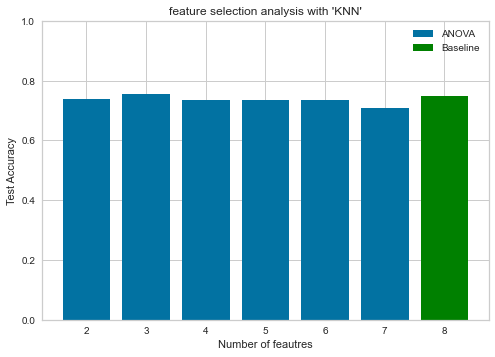

In [122]:

print(KNN_ANOVA_accuracies)
print(KNN_INFO_GAIN_accuracies)

max_accuracy_anova = np.max(KNN_ANOVA_accuracies)
max_accuracy_info = np.max(KNN_INFO_GAIN_accuracies)

print(f'maximum score with anova = {max_accuracy_anova} , and the number of features = {n_features[KNN_ANOVA_accuracies.index(max_accuracy_anova)]}')
print(f'maximum score with Information Gain = {max_accuracy_info} , and the number of features = {n_features[KNN_INFO_GAIN_accuracies.index(max_accuracy_info)]}')
print("---------------------------------------------------------------------------------------")
max = max_accuracy_info
if max< max_accuracy_anova:
    max= max_accuracy_anova
    print (f"the best Method is ANOVA with accuracy = {max} \nthe number of features = {n_features[KNN_ANOVA_accuracies.index(max)]}")
    plt.bar(n_features,KNN_ANOVA_accuracies,label="ANOVA")
    plt.bar([8],[evaluation_KNN],label="Baseline",color ="green")
    # plt.bar(n_features,KNN_INFO_GAIN_accuracies,label="Iformation Gain")
    plt.title("feature selection analysis with 'KNN'")
    plt.xlabel("Number of feautres")
    plt.ylabel("Test Accuracy")
    plt.legend()
    plt.ylim(0,1)
    plt.show()
else:
    print (f"the best Method is Information Gain with accuracy = {max} \nthe number of features = {n_features[KNN_INFO_GAIN_accuracies.index(max)]}")
    plt.bar(n_features,KNN_INFO_GAIN_accuracies,label="Information Gain")
    plt.bar([8],[evaluation_KNN],label="Baseline",color ="green")
    plt.title("feature selection analysis with 'KNN'")
    plt.xlabel("Number of feautres")
    plt.ylabel("Test Accuracy")
    plt.legend()
    plt.ylim(0,1)
    plt.show()


### Secondely with LR

In [123]:
n_features = range(2,len(df.columns)-1)
LR_ANOVA_accuracies, LR_ANOVA_transformed_data = feature_selection(LogReg,X,Y, feature_selection_method= f_classif, range=n_features )
LR_INFO_GAIN_accuracies, LR_INFO_GAIN_transformed_data = feature_selection(LogReg,X,Y, feature_selection_method= mutual_info_classif, range=n_features)

[0.7708333333333334, 0.7760416666666666, 0.7916666666666666, 0.796875, 0.7708333333333334, 0.7604166666666666]
[0.7708333333333334, 0.7864583333333334, 0.7916666666666666, 0.765625, 0.7760416666666666, 0.7604166666666666]
maximum score with anova = 0.796875 , and the number of features = 5
maximum score with information gain = 0.7916666666666666 , and the number of features = 4
---------------------------------------------------------------------------------------
the best Method is ANOVA with accuracy = 0.796875 
the number of features = 5


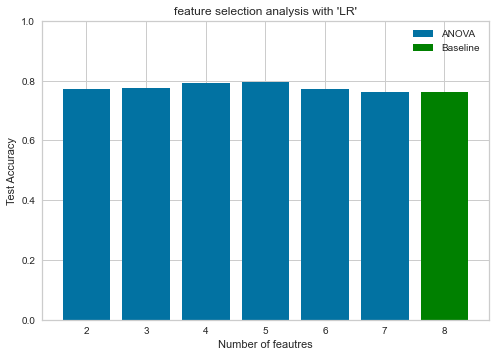

In [124]:
print(LR_ANOVA_accuracies)
print(LR_INFO_GAIN_accuracies)
max_accuracy_anova = np.max(LR_ANOVA_accuracies)
max_accuracy_info = np.max(LR_INFO_GAIN_accuracies)
print(f'maximum score with anova = {max_accuracy_anova} , and the number of features = {n_features[LR_ANOVA_accuracies.index(max_accuracy_anova)]}')
print(f'maximum score with information gain = {max_accuracy_info} , and the number of features = {n_features[LR_INFO_GAIN_accuracies.index(max_accuracy_info)]}')
print("---------------------------------------------------------------------------------------")

max = max_accuracy_info
if max< max_accuracy_anova:
    max= max_accuracy_anova
    print (f"the best Method is ANOVA with accuracy = {max} \nthe number of features = {n_features[LR_ANOVA_accuracies.index(max)]}")
    plt.bar(n_features,LR_ANOVA_accuracies,label="ANOVA")
    plt.bar([8],[evaluation_LR],label="Baseline",color ="green")
    plt.title("feature selection analysis with 'LR'")
    plt.xlabel("Number of feautres")
    plt.ylabel("Test Accuracy")
    plt.legend()
    plt.ylim(0,1)
    plt.show()

else:
    print (f"the best Method is Information Gain with accuracy = {max} \nthe number of features = {n_features[LR_INFO_GAIN_accuracies.index(max)]}")
    plt.bar(n_features,LR_INFO_GAIN_accuracies,label="Information Gain")
    plt.bar([8],[evaluation_LR],label="Baseline",color ="green")
    plt.title("feature selection analysis with 'LR'")
    plt.xlabel("Number of feautres")
    plt.ylabel("Test Accuracy")
    plt.legend()
    plt.ylim(0,1)
    plt.show()


## (b) Wrapper Methods (Forward Feature Elimination, Recursive Feature Elimination).

In [126]:
# from sklearn.feature_selection import RFE
from sklearn.feature_selection import SequentialFeatureSelector
def fs_wrapper_method(model,testModel,X_teain,y_train, direction = "forward", range = range(1,len(df.columns)-1)):
  accuracies=[]
  n_features = range
  for i in n_features:
    feature_selection = SequentialFeatureSelector(model, n_features_to_select=i,direction=direction)
    x_new = feature_selection.fit_transform(X_teain,y_train)
    x_train_new, x_test_new, y_train_new, y_test_new = train_test_split(x_new, Y, test_size=0.25, random_state=0)
    # acc = feature_selection.score(x_test_new,y_test_new)
    acc= testModel(x_train_new, x_test_new, y_train_new, y_test_new)
    accuracies.append(acc)
  return accuracies,(x_train_new, x_test_new, y_train_new, y_test_new)

### First KNN

In [127]:
n_features = range(2,len(df.columns)-1)
KNN_back_accuracies, KNN_back_transformed_data= fs_wrapper_method(KNeighborsClassifier(), KNN_model,X,Y, direction = "backward", range=n_features )
KNN_forward_accuracies,KNN_forward_transformed_data = fs_wrapper_method(KNeighborsClassifier(), KNN_model,X,Y, direction = 'forward', range=n_features)

KNN_back_accuracies:  [0.7395833333333334, 0.7708333333333334, 0.71875, 0.71875, 0.75, 0.75]
KNN_forward_accuracies:  [0.6927083333333334, 0.7239583333333334, 0.7395833333333334, 0.734375, 0.75, 0.703125]
maximum score with RFE = 0.7708333333333334 , and the number of features = 3
maximum score with forward selection = 0.75 , and the number of features = 6
---------------------------------------------------------------------------------------
the best Method is backword selection with accuracy = 0.7708333333333334 
the number of features = 3


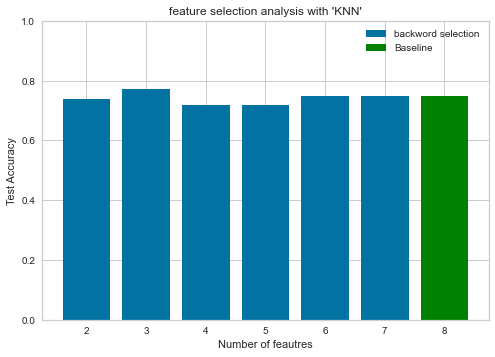

In [128]:

print("KNN_back_accuracies: ",KNN_back_accuracies)
print("KNN_forward_accuracies: ",KNN_forward_accuracies)

max_accuracy_back = np.max(KNN_back_accuracies)
max_accuracy_forward = np.max(KNN_forward_accuracies)

print(f'maximum score with RFE = {max_accuracy_back} , and the number of features = {n_features[KNN_back_accuracies.index(max_accuracy_back)]}')
print(f'maximum score with forward selection = {max_accuracy_forward} , and the number of features = {n_features[KNN_forward_accuracies.index(max_accuracy_forward)]}')
print("---------------------------------------------------------------------------------------")
max = max_accuracy_forward
if max< max_accuracy_back:
    max= max_accuracy_back
    print (f"the best Method is backword selection with accuracy = {max} \nthe number of features = {n_features[KNN_back_accuracies.index(max)]}")
    plt.bar(n_features,KNN_back_accuracies,label="backword selection")
    plt.bar([8],[evaluation_KNN],label="Baseline",color ="green")
    # plt.bar(n_features,KNN_INFO_GAIN_accuracies,label="Iformation Gain")
    plt.title("feature selection analysis with 'KNN'")
    plt.xlabel("Number of feautres")
    plt.ylabel("Test Accuracy")
    plt.legend()
    plt.ylim(0,1)
    plt.show()
else:
    print (f"the best Method is forward selection Gain with accuracy = {max} \nthe number of features = {n_features[KNN_forward_accuracies.index(max)]}")
    plt.bar(n_features,KNN_forward_accuracies,label="forward selection")
    plt.bar([8],[evaluation_KNN],label="Baseline",color ="green")
    plt.title("feature selection analysis with 'KNN'")
    plt.xlabel("Number of feautres")
    plt.ylabel("Test Accuracy")
    plt.legend()
    plt.ylim(0,1)
    plt.show()


### Secondly with LR

In [129]:
n_features = range(2,len(df.columns)-1)
LR_back_accuracies ,LR_back_transofrmed_data= fs_wrapper_method(LogisticRegression(),LogReg,X,Y, direction = "backward", range=n_features )
LR_forward_accuracies ,LR_forward_transformed_data= fs_wrapper_method(LogisticRegression(),LogReg,X,Y, direction = "forward", range=n_features)

LR_back_accuracies:  [0.7708333333333334, 0.7760416666666666, 0.78125, 0.7760416666666666, 0.7760416666666666, 0.765625]
LR_forward_accuracies:  [0.7708333333333334, 0.7760416666666666, 0.78125, 0.7760416666666666, 0.7760416666666666, 0.765625]
maximum score with backword selection = 0.78125 , and the number of features = 2
maximum score with forward selection = 0.78125 , and the number of features = 4
---------------------------------------------------------------------------------------
the best Method is forward selection with accuracy = 0.78125 
the number of features = 4


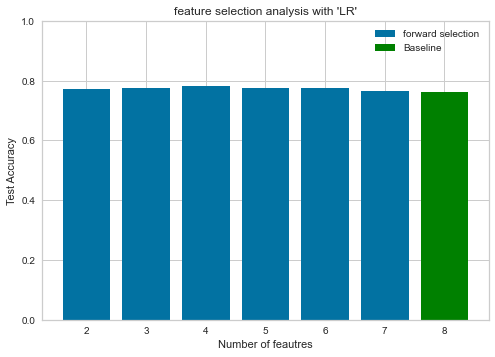

In [130]:

print("LR_back_accuracies: ",LR_back_accuracies)
print("LR_forward_accuracies: ",LR_forward_accuracies)

max_accuracy_back = np.max(LR_back_accuracies)
max_accuracy_forward = np.max(LR_forward_accuracies)

print(f'maximum score with backword selection = {max_accuracy_back} , and the number of features = {n_features[LR_back_accuracies.index(max_accuracy_RFE)]}')
print(f'maximum score with forward selection = {max_accuracy_forward} , and the number of features = {n_features[LR_forward_accuracies.index(max_accuracy_forward)]}')
print("---------------------------------------------------------------------------------------")
max = max_accuracy_forward
if max< max_accuracy_back:
    max= max_accuracy_back
    print (f"the best Method is backword selection with accuracy = {max} \nthe number of features = {n_features[LR_back_accuracies.index(max)]}")
    plt.bar(n_features,LR_back_accuracies,label="backword selection")
    plt.bar([8],[evaluation_LR],label="Baseline",color ="green")
    plt.title("feature selection analysis with 'LR'")
    plt.xlabel("Number of feautres")
    plt.ylabel("Test Accuracy")
    plt.legend()
    plt.ylim(0,1)
    plt.show()
else:
    print (f"the best Method is forward selection with accuracy = {max} \nthe number of features = {n_features[LR_forward_accuracies.index(max)]}")
    plt.bar(n_features,LR_forward_accuracies,label="forward selection")
    plt.bar([8],[evaluation_LR],label="Baseline",color ="green")
    plt.title("feature selection analysis with 'LR'")
    plt.xlabel("Number of feautres")
    plt.ylabel("Test Accuracy")
    plt.legend()
    plt.ylim(0,1)
    plt.show()


## (c) Provide 2D TSNE plots, one for the training set and one for the test set, using
only the best method (either the filter or wrapper). 

### the best for KNN is the Wrapper Method withg Backward Feature Elimination

the best Method is backword selection with accuracy = 0.7708333333333334 
the number of features = 3

training data


c:\Users\debi\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\debi\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


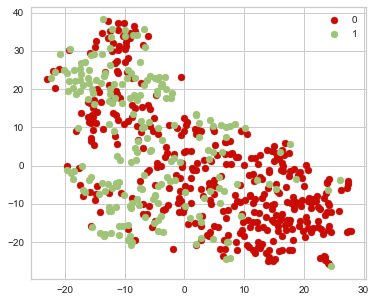

In [132]:
x_train_new, x_test_new, y_train_new, y_test_new = KNN_back_transformed_data
print("training data")
draw_Tsne(x_train_new,y_train_new)

test data


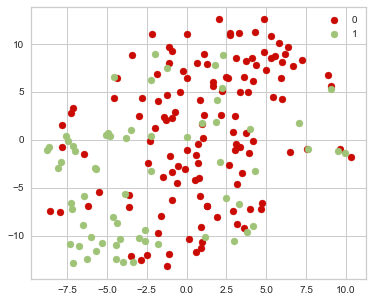

In [134]:
print("test data")
draw_Tsne(x_test_new,y_test_new)

### the best for LR is the Filter Method withg ANOVA

the best Method is ANOVA with accuracy = 0.796875 
the number of features = 5


training data


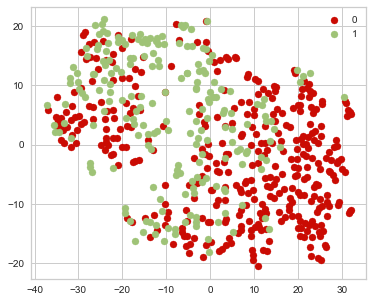

In [135]:
x_train_new, x_test_new, y_train_new, y_test_new = LR_ANOVA_transformed_data
print("training data")
draw_Tsne(x_train_new,y_train_new)

test data


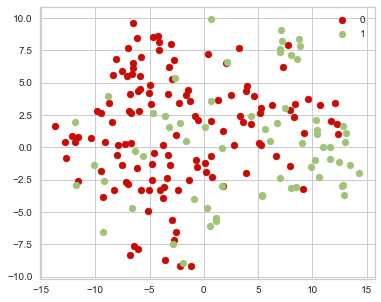

In [136]:
print("test data")
draw_Tsne(x_test_new,y_test_new)

# 5. Choose the best number of cluster for k-means clustering algorithm on the processed
data, using the best features from Q3 or best number of dimensionality Q4.

## (a) Plot the silhouette score vs the number of clusters

### K

In [ ]:
from yellowbrick.cluster.elbow import kelbow_visualizer

model = kelbow_visualizer(KMeans(random_state=0), X, k=(2,17),metric='silhouette',timings=False)  

pass